imports and prepare data

In [75]:
from sklearn import tree

In [76]:
from functions import *
from split_to_series import *
from build_boards_to_files import *

In [ ]:
SIZE = 5
AMOUNT_BOARDS = 100000
AMOUNT_MOVES = 100
NUM_DICT = 1
IGNORE_RANGE = 5

In [78]:
def split_boards(boards, amount, ignore_range, amount_board_in_series):
        if len(boards)>ignore_range:
                boards = boards[ignore_range:]
                if boards[amount - ignore_range - 1]  in boards[:amount-ignore_range-1]: # there is loop
                        boards, amount  = delete_repeat(boards, len(boards))
                #after we delete the repeat boards, we split the board to series
                return [(boards[i:i + amount_board_in_series]) for i in range(len(boards) - amount_board_in_series + 1)]
        else:
                return []

In [79]:
def split_board_to_series(size, amount_boards, amount_moves, num_dict, amount_board_in_series, ignore_range):
    series = []
    for i in range(amount_boards):
        print_numbers(i)

        # path to read
        path_file = path(size, i, amount_moves, num_dict, amount_boards)
        # read the file
        boards_game, amount_boards_of_game = read_file_to_list(path_file, size * size)
        
        splited_boards = split_boards(boards_game, amount_boards_of_game, ignore_range, amount_board_in_series)
        series += splited_boards
    return series

In [80]:
print(SIZE, AMOUNT_BOARDS, AMOUNT_MOVES, NUM_DICT, 2)
data = split_board_to_series(SIZE, AMOUNT_BOARDS, AMOUNT_MOVES, NUM_DICT, 2, IGNORE_RANGE)    

5 10000 50 1 2
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 
51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 
101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 
151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 
201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 
251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 27

In [81]:
print(len(data))

47911


In [82]:
data[:5]

[['0011011111010000', '1101100010000010'],
 ['1101100010000010', '0010000001111111'],
 ['0010000001111111', '0100000000000110'],
 ['1001110001000000', '0011010000000010'],
 ['0011010000000010', '0101001000011000']]

In [83]:
data.sort(key=lambda x: x[0])

In [84]:
data[:5]

[['0000000000000000', '0110001111100010'],
 ['0000000000000000', '0100001110000000'],
 ['0000000000000000', '0001000000001111'],
 ['0000000000000000', '0101000110001000'],
 ['0000000000000000', '0011100100000100']]

In [85]:
unique_list = []
prev_first_item = None
for i, item in enumerate(data):
    # print_numbers(i)
    if item[0] != prev_first_item:  # Check if the first item of the current item is different from the previous one
        unique_list.append(item)
    prev_first_item = item[0]

In [86]:
len(unique_list)

21079

In [87]:
df = unique_list

In [88]:
df

[['0000000000000000', '0110001111100010'],
 ['0000000000000001', '1000110001010000'],
 ['0000000000000010', '0101000000000000'],
 ['0000000000000011', '0001100000000000'],
 ['0000000000000100', '1011110110000110'],
 ['0000000000000101', '1001111111111000'],
 ['0000000000000110', '1101101001010000'],
 ['0000000000000111', '0100000000000000'],
 ['0000000000001000', '0101001010001000'],
 ['0000000000001001', '0110111101000000'],
 ['0000000000001010', '1011000000000000'],
 ['0000000000001011', '0011010000000000'],
 ['0000000000001100', '1110011100100100'],
 ['0000000000001101', '1010100000000000'],
 ['0000000000001110', '0100001000000000'],
 ['0000000000001111', '1111111101100001'],
 ['0000000000010000', '0000001111101100'],
 ['0000000000010001', '0100000000000000'],
 ['0000000000010010', '1001100000000000'],
 ['0000000000010011', '0101001000000000'],
 ['0000000000010100', '0011110111111000'],
 ['0000000000010101', '1010001100000000'],
 ['0000000000010110', '0011111111110000'],
 ['00000000

In [89]:
df[:5]

[['0000000000000000', '0110001111100010'],
 ['0000000000000001', '1000110001010000'],
 ['0000000000000010', '0101000000000000'],
 ['0000000000000011', '0001100000000000'],
 ['0000000000000100', '1011110110000110']]

In [90]:
df[29750:29756]

[]

In [91]:
X_train ,X_test, y_train, y_test = prepare_data(df, 0.1)

0 
50 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850 900 950 1000 1050 1100 1150 1200 1250 1300 1350 1400 1450 1500 1550 1600 1650 1700 1750 1800 1850 1900 1950 2000 2050 2100 2150 2200 2250 2300 2350 2400 2450 2500 2550 2600 2650 2700 2750 2800 2850 2900 2950 3000 3050 3100 3150 3200 3250 3300 3350 3400 3450 3500 3550 3600 3650 3700 3750 3800 3850 3900 3950 4000 4050 4100 4150 4200 4250 4300 4350 4400 4450 4500 4550 4600 4650 4700 4750 4800 4850 4900 4950 5000 5050 5100 5150 5200 5250 5300 5350 5400 5450 5500 5550 5600 5650 5700 5750 5800 5850 5900 5950 6000 6050 6100 6150 6200 6250 6300 6350 6400 6450 6500 6550 6600 6650 6700 6750 6800 6850 6900 6950 7000 7050 7100 7150 7200 7250 7300 7350 7400 7450 7500 7550 7600 7650 7700 7750 7800 7850 7900 7950 8000 8050 8100 8150 8200 8250 8300 8350 8400 8450 8500 8550 8600 8650 8700 8750 8800 8850 8900 8950 9000 9050 9100 9150 9200 9250 9300 9350 9400 9450 9500 9550 9600 9650 9700 9750 9800 9850 9900 9950 10000 
10050 10100 101

In [92]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

18971
18971
2108
2108


In [93]:
dt = tree.DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)

# The error on the training and test data sets
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                                measure_error(y_test, y_test_pred, 'test')],
                                axis=1)

print(dt.tree_.node_count, dt.tree_.max_depth)
train_test_full_error

19477 16


,train,test
accuracy,1.0,0.553605
precision,1.0,0.374847
recall,1.0,0.417120
f1,1.0,0.394855


In [94]:
dt.tree_

In [95]:
dec_tree(X_train,y_train, X_test, y_test, 9 ,42)

1021 9


(DecisionTreeClassifier(max_depth=9, random_state=42),
               train      test
 accuracy   0.675294  0.615750
 precision  0.599205  0.393678
 recall     0.287854  0.186141
 f1         0.388889  0.252768)

In [96]:
import pickle
import json

In [97]:
# pickle.dumps(dt,)
# json.dumps()

In [98]:
def dec_tree(X_train,y_train, X_test, y_test, md ,rs):
    """_summary_

    Args:
        X_train (list): 
        y_train (list): 
        X_test (list): 
        y_test (list): 
        md (int): max depth
        rs (int): random state
    """
    dt = tree.DecisionTreeClassifier(max_depth = md, random_state=rs)
    dt = dt.fit(X_train, y_train)

    # The error on the training and test data sets
    y_train_pred = dt.predict(X_train)
    y_test_pred = dt.predict(X_test)

    train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                                    measure_error(y_test, y_test_pred, 'test')],
                                    axis=1)

    return dt, dt.tree_.node_count, dt.tree_.max_depth, train_test_full_error

In [99]:
dt, node_count, max_depth, train_test_full_error = dec_tree(X_train,y_train, X_test, y_test, 10, 42)
print(dt)
print(node_count, max_depth)
print(train_test_full_error)

DecisionTreeClassifier(max_depth=10, random_state=42)
2009 10
              train      test
accuracy   0.701808  0.605787
precision  0.639063  0.401656
recall     0.388750  0.263587
f1         0.483426  0.318294


In [100]:
with open('decision_tree_model.pkl', 'wb') as file:
    pickle.dump(df, file)

In [101]:
with open('decision_tree_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [102]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                                measure_error(y_test, y_test_pred, 'test')],
                                axis=1)
train_test_full_error

,train,test
accuracy,0.701808,0.605787
precision,0.639063,0.401656
recall,0.388750,0.263587
f1,0.483426,0.318294


In [103]:
depth_to_check = [4,5,6,7,8,9,10,15,20,30,50,100]

for i in depth_to_check:
    dt, node_count, max_depth, train_test_full_error  = dec_tree(X_train,y_train, X_test, y_test, i, 42)
    
    name_file = f"{PATH_MODELS}\\forward_model\\{SIZE}\\decision_tree_size{SIZE}_model_{str(i)}.pkl"
    with open(name_file, 'wb') as file:
        pickle.dump(dt, file)
    
    print(node_count, max_depth)
    print(train_test_full_error)

31 4
              train      test
accuracy   0.641558  0.646110
precision  0.506241  0.434211
recall     0.053606  0.044837
f1         0.096946  0.081281
63 5
              train      test
accuracy   0.642771  0.651328
precision  0.554795  0.517241
recall     0.023792  0.020380
f1         0.045627  0.039216
127 6
              train      test
accuracy   0.644194  0.648482
precision  0.533333  0.473118
recall     0.069320  0.059783
f1         0.122693  0.106152
255 7
              train      test
accuracy   0.650730  0.640417
precision  0.543385  0.454918
recall     0.168307  0.150815
f1         0.257008  0.226531
511 8
              train      test
accuracy   0.659428  0.638994
precision  0.562276  0.458472
recall     0.230724  0.187500
f1         0.327189  0.266152
1021 9
              train      test
accuracy   0.675294  0.615750
precision  0.599205  0.393678
recall     0.287854  0.186141
f1         0.388889  0.252768
2009 10
              train      test
accuracy   0.701808  0.6057

In [104]:
name_file = f"{PATH_MODELS}\\forward_model\\{SIZE}\\decision_tree_size{SIZE}_model_10.pkl"
with open(name_file, 'rb') as file:
    loaded_model = pickle.load(file)
tree_text = tree.export_text(loaded_model)
print("Decision Tree Structure:\n", tree_text)

Decision Tree Structure:
 |--- feature_15 <= 0.50
|   |--- feature_11 <= 0.50
|   |   |--- feature_6 <= 0.50
|   |   |   |--- feature_10 <= 0.50
|   |   |   |   |--- feature_9 <= 0.50
|   |   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_13 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_0 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_13 >  0.50
|   |   |   |   |   |   |   |   |   |--- feature_12 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_12 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_2 >  0.50
|   |   |   |   |   |   |   |   |--- feature_1 <= 0.50
|  

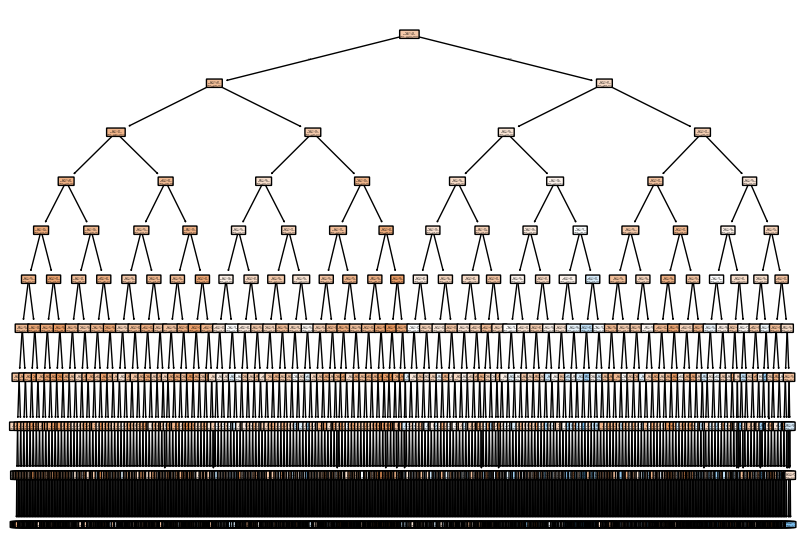

In [105]:
plt.figure(figsize=(10, 7))
tree.plot_tree(loaded_model, class_names=['0', '1'], filled=True, rounded=True)
plt.show()

In [106]:
y_train_pred = loaded_model.predict(X_train)
y_test_pred = loaded_model.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                                measure_error(y_test, y_test_pred, 'test')],
                                axis=1)
print(node_count, max_depth)
train_test_full_error

19477 16


,train,test
accuracy,0.701808,0.605787
precision,0.639063,0.401656
recall,0.388750,0.263587
f1,0.483426,0.318294
